In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
plt.style.use('default')

from tensorflow.keras.optimizers import Adam

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [4]:
dfCrime = pd.read_csv('data/crime_in_Seoul.csv', encoding='euc-kr',thousands = ',')
dfCrime

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861
5,용산서,5,5,14,14,194,173,1557,587,2050,1704
6,성북서,2,2,2,1,86,71,953,409,1194,1015
7,동대문서,5,5,13,13,173,146,1981,814,2548,2227
8,마포서,8,8,14,10,294,247,2555,813,2983,2519
9,영등포서,14,12,22,20,295,183,2964,978,3572,2961


In [5]:
dfCrime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     int64 
 8   절도 검거   31 non-null     int64 
 9   폭력 발생   31 non-null     int64 
 10  폭력 검거   31 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.8+ KB


In [6]:
dfCrime.columns

Index(['관서명', '살인 발생', '살인 검거', '강도 발생', '강도 검거', '강간 발생', '강간 검거', '절도 발생',
       '절도 검거', '폭력 발생', '폭력 검거'],
      dtype='object')

In [7]:
# 1. 
max_idx = dfCrime['살인 발생'].argmax()
print(dfCrime.loc[max_idx,['관서명','살인 발생','살인 검거']])

관서명      영등포서
살인 발생      14
살인 검거      12
Name: 9, dtype: object


In [8]:
dfCrime['절도 발생']


0     1395
1     1070
2     1153
3     1812
4     1114
5     1557
6      953
7     1981
8     2555
9     2964
10    1607
11    1865
12    3026
13     819
14    1434
15    1567
16    2135
17    2411
18    2706
19    2096
20    2366
21     832
22    2335
23    1982
24    1890
25    3239
26    2193
27     653
28    1095
29    1063
30    1439
Name: 절도 발생, dtype: int64

In [9]:
# 관련 라이브러리 임포트 
import matplotlib
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

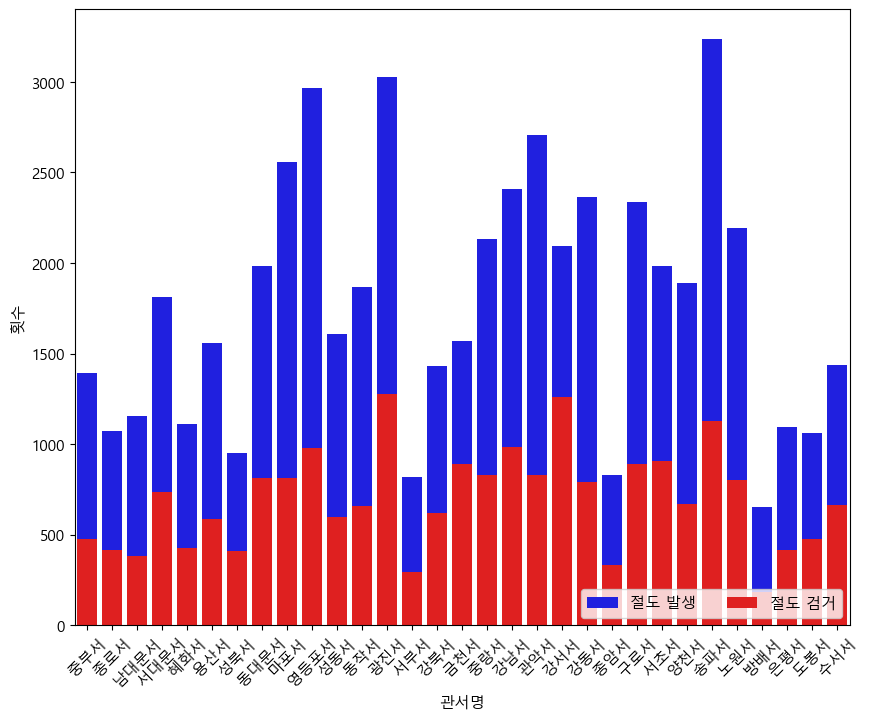

In [10]:
# 2.
plt.figure(figsize=(10,8))
sb.barplot(x='관서명', y='절도 발생', data=dfCrime,
            label='절도 발생', color='b')
sb.barplot(x='관서명', y='절도 검거', data=dfCrime,
            label='절도 검거', color='r')
plt.legend(ncol=2, loc="lower right", frameon=True)
plt.xticks(rotation=45)
plt.ylabel('횟수')
plt.show()

In [11]:
# 3.
dfCrime['절도 검거율'] = dfCrime['절도 검거'] / dfCrime['절도 발생']
dfCrime.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,절도 검거율
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,0.341935
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,0.385981
2,남대문서,1,0,6,4,65,46,1153,382,869,794,0.331310
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,0.407285
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,0.380610


In [12]:
# 4
top5_idx = dfCrime['폭력 발생'].sort_values()[-5:].index
dfCrime.loc[top5_idx,['관서명','폭력 발생','폭력 검거']]

,관서명,폭력 발생,폭력 검거
22,구로서,3007,2432
19,강서서,3207,2718
25,송파서,3295,2786
18,관악서,3298,2642
9,영등포서,3572,2961


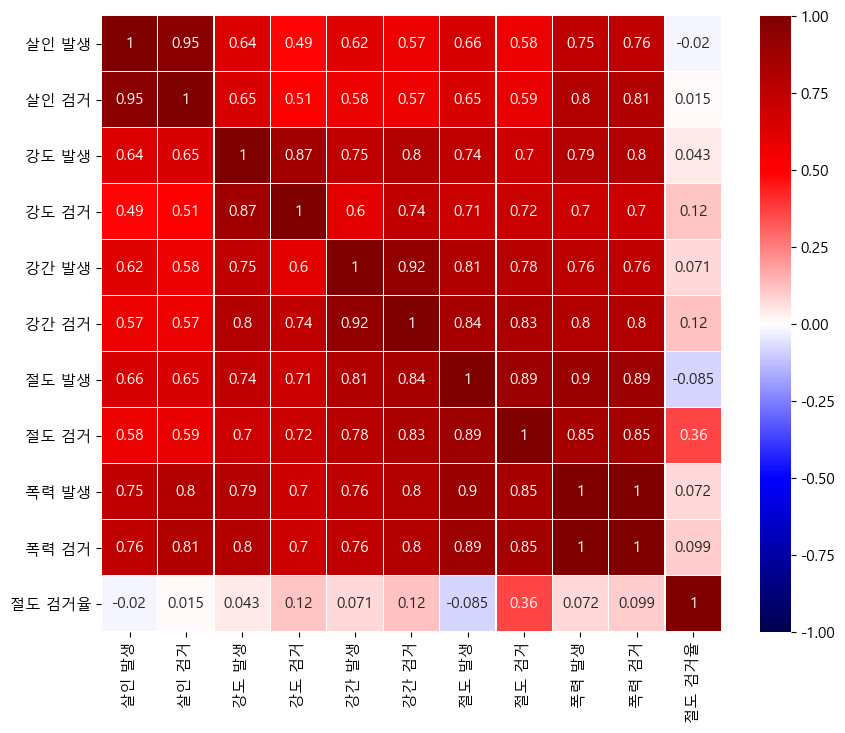

In [13]:
# 5
plt.figure(figsize=(10,8))
sb.heatmap(dfCrime.corr(), 
           vmin=-1, vmax=1, 
           annot=True, 
           linewidths=0.2,
           cmap='seismic') # 습관처럼 확인 *** 반드시 그리기
plt.show()

In [14]:
# 6
x_data = dfCrime['살인 발생']
y_data = dfCrime['폭력 발생']

x = tf.constant(x_data, tf.float32)
y = tf.constant(y_data, tf.float32)

w = tf.Variable(tf.random.uniform([1,1]))
b = tf.Variable(tf.random.uniform([1]))

def compute_loss():
    hx = x*w + b #tf.matmul(x,w) + b
    cost = tf.reduce_mean((hx-y)**2)
    return cost

optimizer = Adam(learning_rate=0.1)
for i in range(5000):
    optimizer.minimize(compute_loss, var_list=[w,b])

def hxFn(xdata):
    hx = w*xdata + b
    return hx.numpy()

print(hxFn([[5]]))

[[1757.4376]]


In [15]:
dense = Dense( units=1, input_dim=1 ) # w: 3x1, b:1 으로 초기값 설정
model = Sequential([dense])
model.compile(loss='mse', optimizer=Adam(0.1))
h = model.fit(x_data, y_data, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 170ms/step - loss: 5113701.0000
Epoch 2/5000
1/1 [==============================] - 0s 998us/step - loss: 5110624.0000
Epoch 3/5000
1/1 [==============================] - 0s 2ms/step - loss: 5107548.0000
Epoch 4/5000
1/1 [==============================] - 0s 998us/step - loss: 5104474.0000
Epoch 5/5000
1/1 [==============================] - 0s 2ms/step - loss: 5101399.5000
Epoch 6/5000
1/1 [==============================] - 0s 2ms/step - loss: 5098327.5000
Epoch 7/5000
1/1 [==============================] - 0s 2ms/step - loss: 5095255.0000
Epoch 8/5000
1/1 [==============================] - 0s 996us/step - loss: 5092185.0000
Epoch 9/5000
1/1 [==============================] - 0s 3ms/step - loss: 5089116.5000
Epoch 10/5000
1/1 [==============================] - 0s 2ms/step - loss: 5086048.0000
Epoch 11/5000
1/1 [==============================] - 0s 2ms/step - loss: 5082981.5000
Epoch 12/5000
1/1 [==============================] - 0s

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 996us/step - loss: 1547361.0000
Epoch 1839/5000
1/1 [==============================] - 0s 1ms/step - loss: 1546323.1250
Epoch 1840/5000
1/1 [==============================] - 0s 2ms/step - loss: 1545285.6250
Epoch 1841/5000
1/1 [==============================] - 0s 2ms/step - loss: 1544249.2500
Epoch 1842/5000
1/1 [==============================] - 0s 2ms/step - loss: 1543213.5000
Epoch 1843/5000
1/1 [==============================] - 0s 2ms/step - loss: 1542178.6250
Epoch 1844/5000
1/1 [==============================] - 0s 2ms/step - loss: 1541144.2500
Epoch 1845/5000
1/1 [==============================] - 0s 998us/step - loss: 1540110.6250
Epoch 1846/5000
1/1 [==============================] - 0s 2ms/step - loss: 1539077.7500
Epoch 1847/5000
1/1 [==============================] - 0s 2ms/step - loss: 1538045.8750
Epoch 1848/5000
1/1 [==============================] - 0s 2ms/step - loss: 1537014.8750
Epoch 1849/5000
1/1 [=======================

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Epoch 3650/5000
1/1 [==============================] - 0s 997us/step - loss: 603054.5000
Epoch 3651/5000
1/1 [==============================] - 0s 1ms/step - loss: 602891.3125
Epoch 3652/5000
1/1 [==============================] - 0s 2ms/step - loss: 602728.3125
Epoch 3653/5000
1/1 [==============================] - 0s 998us/step - loss: 602565.6875
Epoch 3654/5000
1/1 [==============================] - 0s 997us/step - loss: 602403.2500
Epoch 3655/5000
1/1 [==============================] - 0s 2ms/step - loss: 602240.8125
Epoch 3656/5000
1/1 [==============================] - 0s 2ms/step - loss: 602078.7500
Epoch 3657/5000
1/1 [==============================] - 0s 2ms/step - loss: 601916.9375
Epoch 3658/5000
1/1 [==============================] - 0s 2ms/step - loss: 601755.3750
Epoch 3659/5000
1/1 [==============================] - 0s 2ms/step - loss: 601594.0625
Epoch 3660/5000
1/1 [==============================] - 0s 1ms/step - loss: 601432.8750
Epoch 3661/5000
1/1 [================

In [16]:
model.predict([5])

array([[1756.3586]], dtype=float32)

In [18]:
from sklearn.metrics import r2_score
r2_score(y_data, model.predict(x_data))

0.23984460037155875